<a href="https://colab.research.google.com/github/Dell-Marco/MVP_S2/blob/main/MVP2_Habitos_vs_Desempenho_acad%C3%AAmico_de_alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

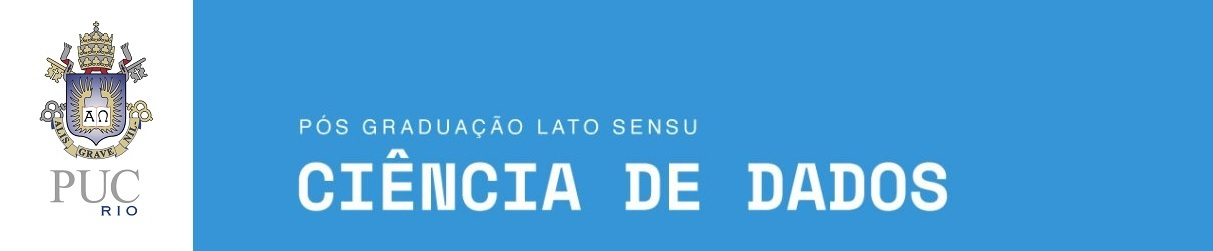

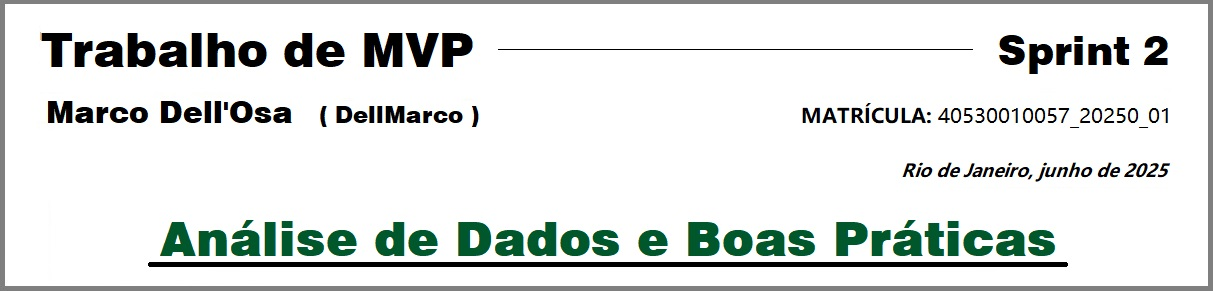

#Introdução
Este trabalho consiste em escolher uma base de dados qualquer, que naõ tenha sido utilizada nos encontros das aulas, e que estão disponiveis em um dos repositorios indicados: Kaggle, UCI ou Google Dataset. Em seguida deverá ser definida a solução para o problema que este dataset nos propoe, passando pelas etapas de pré-processamento de dados, conforme visto na disciplina Análise exploratória e pré-processamento de dados.

#Objetivo
O objetivo é entender e descrever o problema proposto e para isto deverá ser produzido um notebook no Google Colab do tipo 'relatório', descrevendo textualmente o contexto do problema e as operações com os dados. Para a programação deverá ser utilizada a linguagem Python com as bibliotecas apropriadas para abordar o problema proposto. Deverão ser seguidas as boas práticas de codificação vistas no curso.

#Tema
####**Hábitos de Alunos vs. Desempenho Acadêmico**

Já se perguntou o quanto assistir à Netflix, dormir ou rolar a tela do TikTok, ficar nas mídias sociais afeta as notas de um adolescente ou talvez de seus filhos? 😲 Pode ficar surpreso com as respostas que se possam obter deste estudo cujo resultado está neste dataset da plataforma Kaggle que iremos estudar e que pode ser visualizado aqui: [Student Habits vs Academic Performance](https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fjayaantanaath%2Fstudent-habits-vs-academic-performance).

No estudo foram considerados os seguintes aspectos e comparados com o rendimento escolar: idade, sexo, tempo de estudo, tempo nas midias sociais, tempo de exercitação, frequência nas aulas, tempo de sono, tempo de TV, entre outros. Será que se consegue revelar o que mais prejudica estudos?

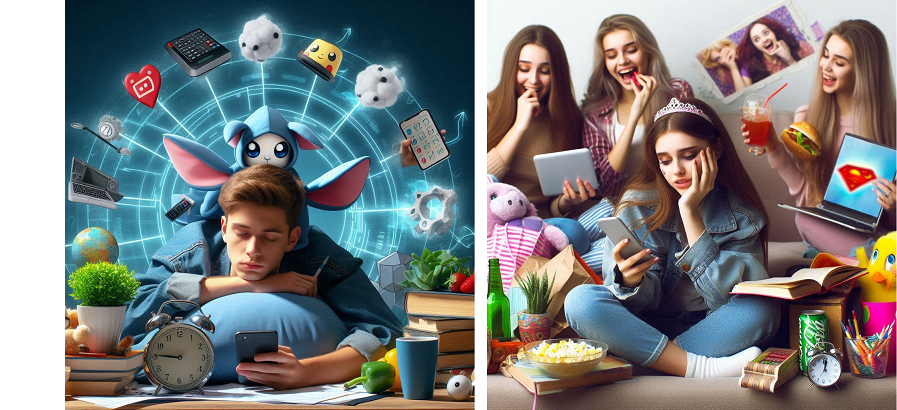

#Descrição do Problema 📐📏
Este é um estudo simulado de hábitos de alunos comparados com seu desempenho acadêmico feito com 1.000 registros de alunos. Cada linha representa um aluno individual, capturando hábitos de vida diários, como tempo de estudo, sono, uso de mídias sociais, qualidade da dieta, avaliação de saúde mental e confrontados com a nota final do exame.

De antemão, imaginamos que alguns dos atributos devam favorecer um bom desempenho nas notas como, tempo de estudo por dia, uma boa dieta, uma boa internet e uma boa saúde mental. Outros atributos, no entanto, são positivos, mas que não superem uma certa quantidade de tempo tipo, quantidade de sono, frequência de exercícios, trabalho em tempo parcial. Finalmente tem os atributos que imaginamos ser bem prejudiais ao rendimento escolar como o tempo de Netflix e de redes sociais. Vamos ver o que dizem os dados?

#Hipóteses do Problema 🔠
As hipótese à qual irei me basear é a seguinte: o que pode levar um estudante a ter um rendimento escolar bom ou ruim? O quanto é prejudicial a um bom rendimento escolar ficar tempo excessivo nas redes sociais ou ficar muitas horas assistindo filmes e séries? E será que estudar demais, dormindo inclusive poucas horas por dia vai aumentar o rendimento?
A pergunta é, o que pode resultar em um bom rendimento escolar? Será que apenas uma boa dieta com exercícios adequados e frequentando todas as aulas vai nos dar um bom rendimento? É o que iremos descobrir com este estudo.

#Tipo de Problema 🤔❓❕
Este é um problema de **classificação supervisionada**, porque neste dataset tem um conjunto de características como tempo de estudo, sono, uso de mídias sociais, qualidade da dieta e saúde mental, que podem ser usadas para prever um rótulo conhecido, que é a nota final do exame. Isso significa que se pode treinar um modelo com exemplos rotulados e ensiná-lo a prever o desempenho acadêmico com base nesses hábitos.

#Seleção de Dados e Restrições 🎲🎲
A restrição sobre o banco de dados é que naõ tenha sido utilizada nos encontros das aulas, e que esteja disponível em um dos repositorios indicados: Kaggle, UCI ou Google Dataset. Este dataset que escolhi é um conjunto de dados disponível na plataforma do Kaggle. Ele foi revisado, mas mesmo assim pode ser necessária alguma etapa de tratamentos de dados.

#Atributos, Instâncias e Definição do Dataset 📈
O dataset contém 1000 instâncias (linhas) e 16 atributos (contando com o ID do aluno). Cada linha representa um aluno com  suas características de comportamento. Apresento a seguir os atributos com a **tradução** e **definição**:

*   ***student_id*** (id do estudante)
*   ***age*** (idade)
*   ***gender*** (sexo)
*   ***study_hours_per_day*** (média de horas de estudo por dia)
*   ***social_media_hours*** (média de horas nas midias sociais por dia)
*   ***netflix_hours*** (médias de horas de Netflix)
*   ***part_time_job*** (trabalha em tempo parcial?)
*   ***attendance_percentage*** (percentual de frequência nas aulas)
*   ***sleep_hours*** (média de horas de sono por dia)
*   ***diet_quality*** (qualidade da dieta)
*   ***exercise_frequency*** (frequência de exercitação na academia)
*   ***parental_education_level*** (nível de escolaridade dos pais)
*   ***internet_quality*** (qualidade da internet)
*   ***mental_health_rating*** (classificação de saúde mental)
*   ***extracurricular_participation*** (participação em atividades extracurriculares)
*   ***exam_score*** (pontuação nos exames)


linha2.jpg

#Programação

---



# Importação das bibliotecas necessárias.  📗📘📚

In [1]:
# Lib para ler e escrever arquivos CSV, filtrar, ordenar e transformar dados, bem como trabalhar com tabelas e dataframes.
import pandas as pd

# Lib para operações matemáticas avançadas, manipulação de arrays.
import numpy as np

# Lib para visualização de dados e criar gráficos.
import matplotlib.pyplot as plt

# Lib para visualização de dados.
import seaborn as sns

# Lib para possibilitar o acesso a recursos do Kaggle, importação do Data Source do Kaggle
import kagglehub
# Lib para interagir com o sistema operacional, manipular arquivos e diretórios
import os

from tabulate import tabulate  #Lib para criar tabela.

# Lib para aprendizado de máquina e pré-processamento de dados.
from sklearn.linear_model import LinearRegression # Exemplo de modelo
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer #usada em split de dados
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# Carga do dataset 🔎 📈

In [2]:
# Baixa o dataset e retorna o caminho para a pasta de onde ele foi baixado.
jayaantanaath_student_habits_vs_academic_performance_path = kagglehub.dataset_download('jayaantanaath/student-habits-vs-academic-performance')
print()
print('\nTABELA 01:  Importação do data source --> OK')
print()
# Construindo o caminho completo para o arquivo CSV dentro da pasta baixada
# O nome do arquivo CSV é 'student_habits_performance.csv'
csv_file_path = os.path.join(jayaantanaath_student_habits_vs_academic_performance_path, 'student_habits_performance.csv')

# Carregando o dataset no Pandas usando o caminho completo
df = pd.read_csv(csv_file_path)

df




TABELA 01:  Importação do data source --> OK



,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


# Análise de Dados 🔎 📈
Numa primeira olhada em algumas das linhas, os dados parecem bem regulares, mas tem 1000 alunos então é preciso verificar mais a fundo.
Vou começar fazendo um pré-processamento básico para ver se tem dados faltando ou se é preciso limpar mais um pouco os dados, substituir valores nulos se tiverem, corrigir eventuais problemas com as unidades etc...


In [3]:
print('\nTABELA 02:  Tipos das instâncias')
print()
df.info()


TABELA 02:  Tipos das instâncias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quali

Da tabela acima nota-se que todos os atributos tem 1000 valores, salvo o atributo 11 (*parental-education_level*) que só tem 909 valores. Muito provavelmente os 91 valores faltantes são nulos, então irei analisar mais a fundo, somando todos os valores nulos de cada atributo e listar.

In [4]:
print('\nTABELA 03:  Soma dos valores nulos')
df.isna().sum() # Soma os valores nulos de cada atributo.


TABELA 03:  Soma dos valores nulos


,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [5]:
# Valores distintos do atributo 'parental_education_level'

df['parental_education_level'].unique()

array(['Master', 'High School', 'Bachelor', nan], dtype=object)

De fato o atributo *parental_education_level* (nível de escolaridade dos pais) tem três niveis de escolaridade: Master, High School e Bachelor, mas tem também alguns valores nulos (**nan**).

 Este atributo é do tipo categórico, além disto apenas cerca de 9% são valores nulos, então o mais indicado a se fazer é preencher estes valores nulos pelo valor da **moda**, que é o valor mais frequente do atributo e é o que farei em seguida.

In [6]:
moda = df["parental_education_level"].mode()[0] # [0] caso seja bimodal, pega o primeiro valor

df["parental_education_level"] = df["parental_education_level"].fillna(moda)  # Substitui os valores nulos pela moda


In [7]:
print('\nTABELA 04:  Valores nulos substituidos')
print()

df.info() #Visualizando novamente o dataframe, com os valores nulos substituidos.


TABELA 04:  Valores nulos substituidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet

In [8]:
print('\nTABELA 05:  Novamente a soma dos valores nulos para verificação')
print()
df.isna().sum()


TABELA 05:  Novamente a soma dos valores nulos para verificação



,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


Na tabela acima verifiquei que o valores nulos da coluna *parental_education_level* foram preenchidos. Somando novamente os valores nulos das colunas novamente a soma resultou em zero valores nulos.

#Estatísticas Descritivas 📉📈
##### **TABELA 06** 😉👇

In [9]:
# Tabela 06 a
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


A tabela acima nos mostra os atributos numéricos onde podemos analisar seus valores de média, desvio padrão, maximo e mínimo, etc...

Comparando os valores dos atributos vejo que eles estão numa ordem de grandeza proporcional entre si, não tem colunas com valores altos demais comparando umas com as outras, então vou optar por não fazer normalizações por enquanto.

Vou analisar agora a disperção calculando o **Coeficiente de Variação** (cv) fazendo:

cv = (desvio padrão * 100) / média

O cv é uma medida relativa que normalmente quando temos alta dispersão relativa, o cv também tende a ser alto. No caso de dados comportamentais podemos usar este critério abaixo:
<br><br>
<table>
  <tr>
    <td><h5><b>VALOR DE CV</b></h5></td>
    <td></td>
    <td><h5><b>INTERPRETAÇÃO</b></h5></td>
  </tr>
  <tr>
    <td><h5>cv < 15%</h5></td>
    <td>--></td>
    <td><h5>dispersão baixa</h5></td>
  </tr>
  <tr>
    <td><h5>cv > 30%</h5></td>
    <td>--></td>
    <td><h5>dispersão alta</h5></td>
  </tr>
  <tr>
    <td><h5>15 <= cv <= 30</h5></td>
    <td>--></td>
    <td><h5>dispersão moderada</h5></td>
  </tr>
  </table>
<br>

Praticamente se os valores estão bem espalhados em relação à média o CV tende a ser alto. Se os valores estão mais concentrados próximos à média CV tende a ser baixo.


In [10]:
# Cálculo do COEFICIENTE DE VARIAÇÃO

vetor_cv = []
dispersao = []
# vetor contendo os numeros das linhas de atributos numéricos
# da Tabela 02, que serão impressos na Tabela 09.
atrib_id = ['age',
            'exercise_frequency',
            'mental_health_rating',
            'gender',
            'part_time_job',
            'diet_quality',
            'parental_education_level',
            'internet_quality',
            'extracurricular_participation'
            ]

# Loop pelas colunas numéricas
for coluna in df.select_dtypes(include="number").columns:  # number é o tipo de dado que quero incluir
    media = df[coluna].mean()
    desvio = df[coluna].std()
    cv = (desvio * 100) / media
    vetor_cv.append(cv)
    if cv > 30:
      dispersao.append("alta")
    elif cv < 15:
      dispersao.append("baixa")
    else:
      dispersao.append("moderada")

# Constroi a tabela para apresentar o resultado
tabela = []
for i, (ai, bi) in enumerate(zip(vetor_cv, dispersao), start=1):
  linha = [atrib_id[i-1], ai, bi]
  tabela.append([atrib_id[i-1], ai, bi])

# Cabeçalhos das colunas
cabecalhos = ["Coluna", "Coef. Variação", "Dispersão"]

print('\nTABELA 07:  Cálculo do Coeficiente de Variação')
print()

# Exibindo a tabela elegante
print(tabulate(tabela, headers=cabecalhos, tablefmt="fancy_grid"))




TABELA 07:  Cálculo do Coeficiente de Variação

╒═══════════════════════════════╤══════════════════╤═════════════╕
│ Coluna                        │   Coef. Variação │ Dispersão   │
╞═══════════════════════════════╪══════════════════╪═════════════╡
│ age                           │          11.2601 │ baixa       │
├───────────────────────────────┼──────────────────┼─────────────┤
│ exercise_frequency            │          41.376  │ alta        │
├───────────────────────────────┼──────────────────┼─────────────┤
│ mental_health_rating          │          46.7939 │ alta        │
├───────────────────────────────┼──────────────────┼─────────────┤
│ gender                        │          59.0821 │ alta        │
├───────────────────────────────┼──────────────────┼─────────────┤
│ part_time_job                 │          11.1721 │ baixa       │
├───────────────────────────────┼──────────────────┼─────────────┤
│ diet_quality                  │          18.9545 │ moderada    │
├────────────

Apenas três atributos tem disperção baixa, atributo age (idade) e o atributo part_time_job (trabalho_meio_período), os outros atributos tem disperção moderada ou alta. Estes outros podem significar presença de valores atípicos ou outliers. Irei verificar mais em seguida com gráficos tipo boxplot.

In [11]:
# Tabela 06 b - Média dos atributo numéricos do dataframe
df.describe().loc['mean']

,mean
age,20.4980
study_hours_per_day,3.5501
social_media_hours,2.5055
netflix_hours,1.8197
attendance_percentage,84.1317
sleep_hours,6.4701
exercise_frequency,3.0420
mental_health_rating,5.4380
exam_score,69.6015


A Tabela 06b acima mostra a média de cada atributo numérico que tende para o ponto de equilibrio do conjunto de dados, mas é sensível a outliers, se existirem.

In [12]:
# Tabela 06 c - Desvio padrão dos atributo numéricos do dataframe
df.describe().loc['std']

,std
age,2.308100
study_hours_per_day,1.468890
social_media_hours,1.172422
netflix_hours,1.075118
attendance_percentage,9.399246
sleep_hours,1.226377
exercise_frequency,2.025423
mental_health_rating,2.847501
exam_score,16.888564


A Tabela 06c mostra o desvio padrão dos atributos numéricos, que indica o quanto os dados estão mais agrupados próximo da média (desvio padrão baixo) ou mais afastados (desvio padrão alto).

Vou listar a seguir quais são os **valores distintos** dos campos categóricos.

In [13]:
# Visualizando os valores distintos de cada coluna categórica
colunas_categoricas = df.select_dtypes(include='object').columns  # Seleciona apenas os atributos categóricos
colunas_categoricas = [col for col in colunas_categoricas]        # Coloca em coluna os atributos, para uma melhor apresentação
colunas_categoricas.remove('student_id')                          # Elimina a coluna 'student_id', pois é irrelevante

# Tabela com os valores distintos de cada coluna categórica
tabela_valores = pd.DataFrame({
    'Atributo Categorico': colunas_categoricas,
    'Valores Distintos': [df[col].unique().tolist() for col in colunas_categoricas]
})
print('\nTABELA 08:  Valores distintos dos atributos categóricos')
print()
tabela_valores


TABELA 08:  Valores distintos dos atributos categóricos



,Atributo Categorico,Valores Distintos
0,gender,"[Female, Male, Other]"
1,part_time_job,"[No, Yes]"
2,diet_quality,"[Fair, Good, Poor]"
3,parental_education_level,"[Master, High School, Bachelor]"
4,internet_quality,"[Average, Poor, Good]"
5,extracurricular_participation,"[Yes, No]"


**TABELA 08** 😉👇
<h2>Resumo e descrição dos atributos do dataframe</h2>

<table>
  <tr>
    <td><b>n</b></td>
    <td><b>NOME ATRIBUTO</b></td>
    <td><b>TRADUÇÃO</b></td>
    <td><b>TIPO DE DADO</b></td>
    <td><b>UNIDADE</b></td>
    <td><b>VALOR MIN</b></td>
    <td><b>VALOR MAX</b></td>
    <td><b>VALORES CATEGÓRICOS</b></td>
    <td><b>TIPO</b></td>
  </tr>
  <tr>
    <td>1</td>
    <td>student_id</td>
    <td>id do estudante</td>
    <td>text</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>nominal</td>
  </tr>
  <tr>
    <td>2</td>
    <td>age</td>
    <td>idade</td>
    <td>int</td>
    <td>anos</td>
    <td>17</td>
    <td>24</td>
    <td>-</td>
    <td>numérico</td>
  </tr>
  <tr>
    <td>3</td>  
    <td>gender</td>
    <td>sexo</td>
    <td>text</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>Female; Male; Other</td>
    <td>categórico</td>
  </tr>
  <tr>
    <td>4</td>
    <td>study_hours_per_day</td>
    <td>média de horas de estudo por dia</td>
    <td>float</td>
    <td>horas/dia</td>
    <td>0.0</td>
    <td>8.3</td>
    <td>-</td>
    <td>numérico</td>
  </tr>
  <tr>
    <td>5</td>
    <td>social_media_hours</td>
    <td>média de horas nas midias sociais por dia</td>
    <td>float</td>
    <td>horas/dia</td>
    <td>0.0</td>
    <td>7.2</td>
    <td>-</td>
    <td>numérico</td>
  </tr>
  <tr>
    <td>6</td>
    <td>netflix_hours</td>
    <td>médias de horas de Netflix</td>
    <td>float</td>
    <td>horas/dia</td>
    <td>0.0</td>
    <td>5.4</td>
    <td>-</td>
    <td>numérico</td>
  </tr>
  <tr>
    <td>7</td>
    <td>part_time_job</td>
    <td>trabalha em tempo parcial?</td>
    <td>text</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>Yes; No</td>
    <td>categórico</td>
  </tr>
  <tr>
    <td>8</td>
    <td>attendance_percentage</td>
    <td>percentual de frequência nas aulas</td>
    <td>int</td>
    <td>percentual</td>
    <td>56</td>
    <td>100</td>
    <td>-</td>
    <td>numérico</td>
  </tr>
  <tr>
    <td>9</td>
    <td>sleep_hours</td>
    <td>média de sono por dia</td>
    <td>float</td>
    <td>horas/dia</td>
    <td>3.2</td>
    <td>10</td>
    <td>-</td>
    <td>numérico</td>
  </tr>
  <tr>
    <td>10</td>
    <td>diet_quality</td>
    <td>qualidade da dieta</td>
    <td>text</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>Fair; Good; Poor</td>
    <td>categórico</td>
  </tr>
   <tr>
    <td>11</td>
    <td>exercise_frequency</td>
    <td>frequência de exercitação, academia</td>
    <td>int</td>
    <td>dias/semana</td>
    <td>0</td>
    <td>6</td>
    <td>-</td>
    <td>numérico</td>
  </tr>
    <tr>
    <td>12</td>
    <td>parental_education_level</td>
    <td>nível de escolaridade dos pais</td>
    <td>text</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>Master; High School; Bachelor</td>
    <td>categórico</td>
  </tr>
    <tr>
    <td>13</td>
    <td>internet_quality</td>
    <td>qualidade da internet</td>
    <td>text</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>Average; Poor; Good</td>
    <td>categórico</td>
  </tr>
    <tr>
    <td>14</td>  
    <td>mental_health_rating</td>
    <td>classificação de saúde mental</td>
    <td>int</td>
    <td>pontuação</td>
    <td>1</td>
    <td>10</td>
    <td>-</td>
    <td>numérico</td>
  </tr>
    <tr>
    <td>15</td>  
    <td>extracurricular_participation</td>
    <td>participação em atividades extracurriculares</td>
    <td>text</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>Yes; No</td>
    <td>categórico</td>
  </tr>
    <tr>
    <td>16</td>  
    <td>exam_score</td>
    <td>pontuação nos exames</td>
    <td>float</td>
    <td>pontuação</td>
    <td>18.4</td>
    <td>100</td>
    <td>-</td>
    <td>numérico</td>
  </tr>
</table>


---
Reuní na tabela acima o dataframe e todas as características dos atributos para uma melhor visualização geral.


linha2.jpg

## Visualização da distribuição com histogramas e gráficos de barras.

Aqui estou criando dois vetores, um com os atributos numéricos (col_numéricas) e outro com os atributos categóricos (col_categóricas). Isto irá me ajudar mais pra frente para plotar os gráficos.

In [14]:
# Visualizando os valores distintos de cada coluna categórica
col_categoricas = df.select_dtypes(include='object').columns  # Seleciona apenas os atributos categóricos
col_categoricas = [col for col in col_categoricas]            # Coloca em coluna os atributos, para uma melhor apresentação
col_categoricas.remove('student_id')                          # Elimina a coluna 'student_id', pois é irrelevante neste caso

# Visualizando os valores distintos de cada coluna numérica
col_numericas = df.select_dtypes(exclude='object').columns    # Seleciona apenas os atributos categóricos
col_numericas = [col for col in col_numericas]                # Coloca em coluna os atributos, para uma melhor apresentação

print('\033[4;1mLista dos atributos numéricos\033[0m')     # Para realçar com negrito usei códigos ANSI
for numero, col in enumerate(col_numericas, start=0):
    print(f"{numero}: {col}")

print() # linha em branco

print('\033[4;1mLista dos atributos categóricos\033[0m')
for numero, col in enumerate(col_categoricas, start=0):
    print(f"{numero}: {col}")



Lista dos atributos numéricos
0: age
1: study_hours_per_day
2: social_media_hours
3: netflix_hours
4: attendance_percentage
5: sleep_hours
6: exercise_frequency
7: mental_health_rating
8: exam_score

Lista dos atributos categóricos
0: gender
1: part_time_job
2: diet_quality
3: parental_education_level
4: internet_quality
5: extracurricular_participation




---


##### Gráficos de histograma para os atributos numéricos

---



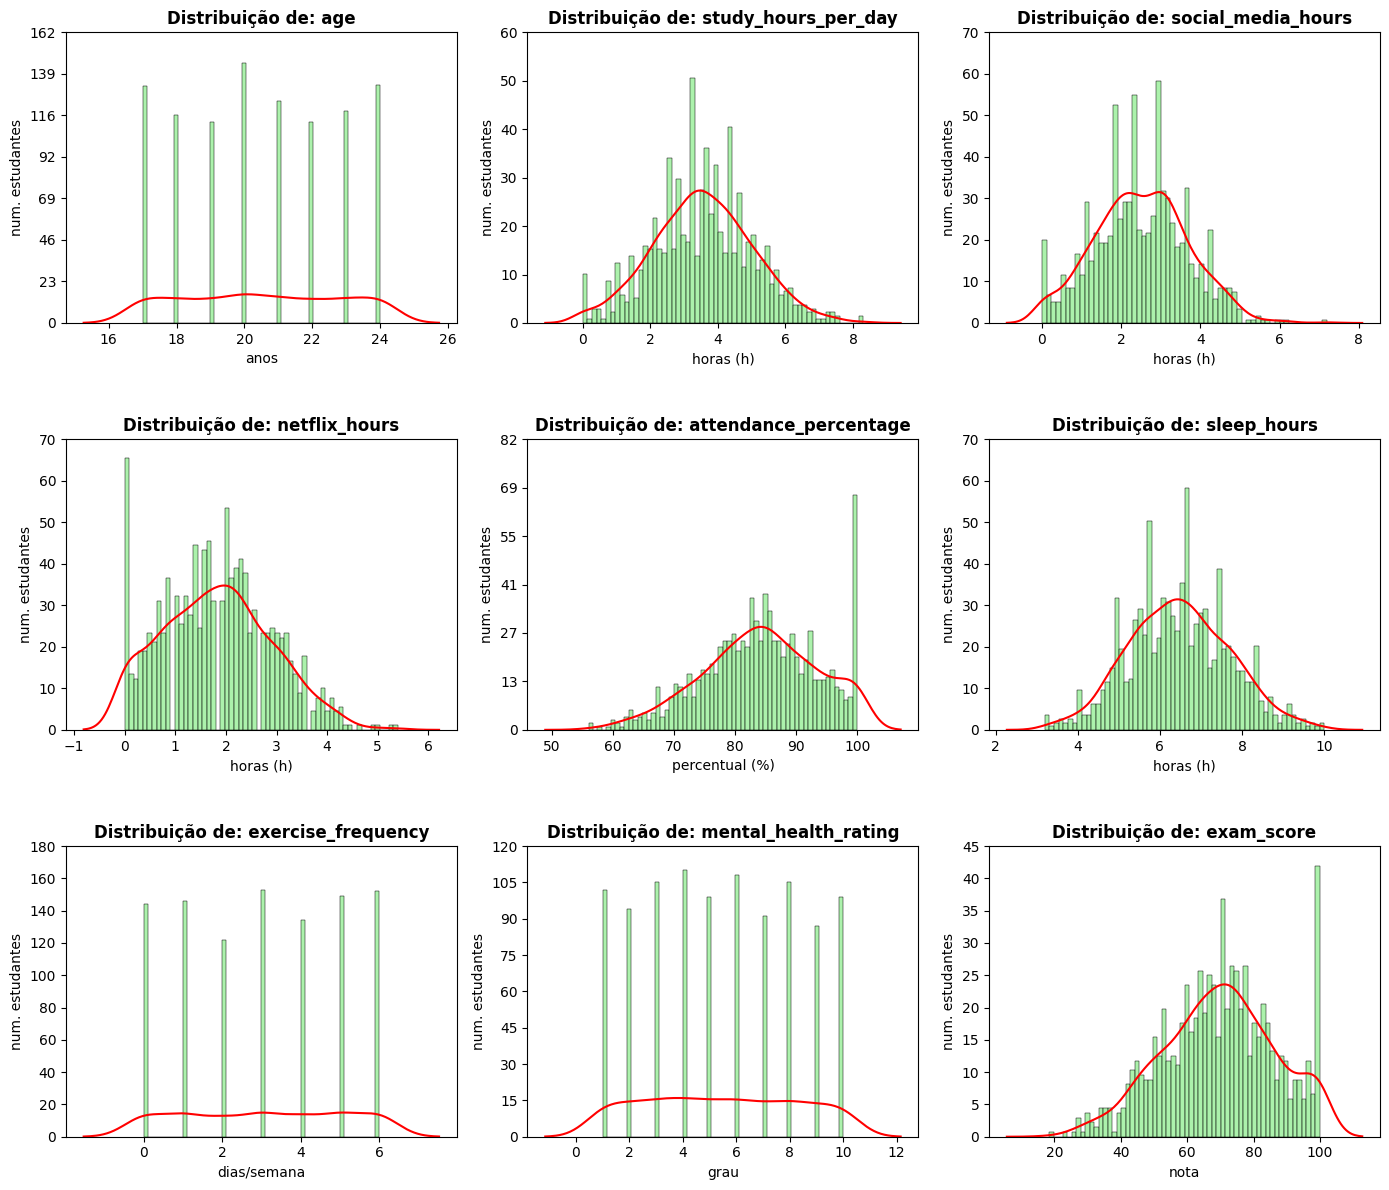

In [15]:
plt.figure(figsize=(14,12))
from matplotlib import colors

# Este loop é pra colocar a legenda do X (xlabel) no gráfico correto.
for i in range(9):
    plt.subplot(3, 3, i+1)  # subplot index i começa com 0

    ax = sns.histplot(df[col_numericas[i]], bins=60, stat="density", fill=True, color ='lightgreen', edgecolor='black')
    sns.kdeplot(df[col_numericas[i]], color="r") # mostra a linha KDE

    y_ticks = ax.get_yticks()
    ax.set_yticks(y_ticks)  # Fixando os ticks explicitamente
    ax.set_yticklabels([f'{int(y*100)}' for y in y_ticks])

    plt.title(f'Distribuição de: {col_numericas[i]}', fontweight='bold')
    plt.ylabel('num. estudantes')

    match i:  # Seleciona o atributo o atributos para colocar a legenda correspondente e a escala do eixo Y
        case 0:
            plt.xlabel('anos')
            ax.set_yticklabels([f'{int(y*116)}' for y in y_ticks])
        case 4:
            plt.xlabel('percentual (%)')
            ax.set_yticklabels([f'{int(y*690)}' for y in y_ticks])
        case 6:
            plt.xlabel('dias/semana')
        case 7:
            plt.xlabel('grau')
            ax.set_yticklabels([f'{int(y*150)}' for y in y_ticks])
        case 8:
            plt.xlabel('nota')
            ax.set_yticklabels([f'{int(y*1000)}' for y in y_ticks])
        case _:
            plt.xlabel('horas (h)')

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()


Os gráficos acima ***age*** (idade), ***exercise_frequency*** (frequência de exercicíos) e ***mental_health_rating*** (saúde mental) mostram que os dados estão bem distribuidos entre si de forma relativamente uniforme. O gráfico ***age*** (idade) mostra que tem praticamente a mesma quantidade de jovens distribuidos entre 17 e 24 anos. Assim acontece também com os gráficos de ***exercise_frequency*** (frequência de exercícios) e ***mental_healt_rating*** (nível de saúde mental).

Os outros gráficos indicam ou uma distribuição normal (gaussiana) ou uma distribuição assimetrica. O gráfico que está mais perto de uma distribuição gaussiana é o de ***sleep_hours*** (horas de sono), os outros estão mais para uma distribuição assimétrica, pois as barras tendem a encostar mais para um dos lados do gráfico.<br>
A curva de densidade estimada em vermelho (KDE), mostra que as colunas ***social_media_hours***, ***netflix_hours***, ***attendance_percentage*** (frequência escolar), ***sleep_hours*** e ***exam_score*** (notas de provas) são bimodais que pode significar grupo de estudantes com comportamentos bem diferentes entre si nesta mesma avaliação.

Outro ponto interessante que se nota é que os gráficos de ***netflix_hours*** (horas de netflix), ***attendance_percentage*** e ***exam_score*** (notas) tem un salto em uma das laterais. Isto é um forte indício de serem outliers. No caso da Netflix vejo que tem muita gente assistindo pouco e pouca gente assistindo muito.



---


##### Gráficos de barra para os atributos categóricos

---



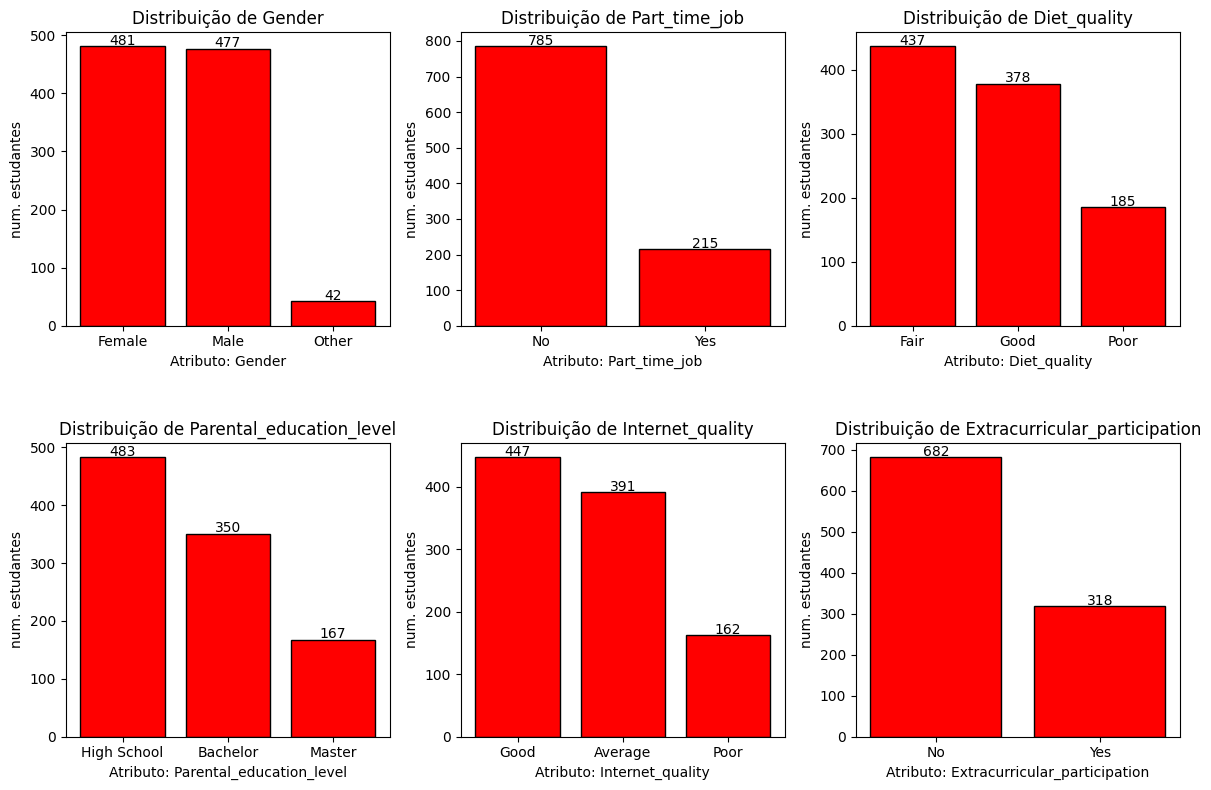

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Loop sobre os atributos e eixos para plotar
for ax, atributo in zip(axs.flat, col_categoricas):
    frequencias = df[atributo].value_counts()
    barras = ax.bar(frequencias.index, frequencias.values, color='red', edgecolor='black')

    # Adicionar os valores acima das barras
    ax.bar_label(barras, padding=-1)

    ax.set_title(f'Distribuição de {atributo.capitalize()}')
    ax.set_xlabel(f'Atributo: {atributo.capitalize()}')
    ax.set_ylabel('num. estudantes')

plt.tight_layout()
plt.subplots_adjust(hspace=0.4) # Aumenta um pouco o espaço entre as fileiras de gráficos
plt.show()

Olhando os gráficos acima, o gráfico *gender* (sexo) mostra que a proporção entre homens e mulheres é praticamente igual. O gráfico *extracurricular_participation* mostra que 2/3 dos alunos não tem participação extracurricular e o gráfico *part_time_job* mostra que mais de 3/4 dos alunos não trabalha em tempo parcial, estes dois últimos atributos estão um pouco desbalanceados.


---



Nos próximos passos irei analisar melhor os atributos numéricos cujo histograma acima resultou do tipo distribuição normal e assimétrico, farei uma plotagem do tipo **boxplot**. Este tipo de gráfico vai mostrar melhor as assimetrias e os outliers.

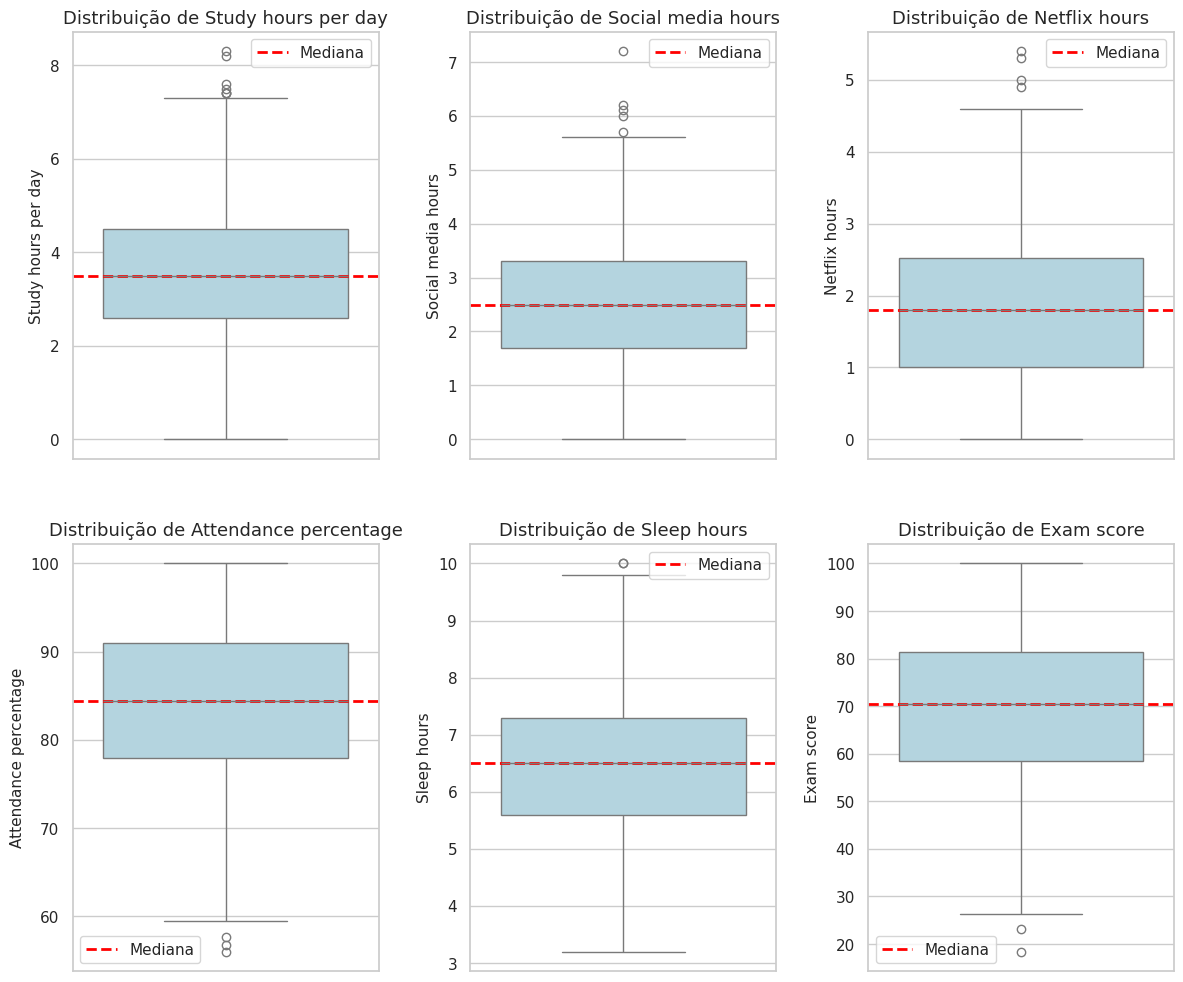

In [17]:
# Lista dos atributos a serem plotados com gráficos tipo boxplot

var_gauss = [
    'study_hours_per_day',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'sleep_hours',
    'exam_score']

# Estilo
sns.set(style='whitegrid')

# Criando subplots: 2 linhas, 3 colunas
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

# Gerando os boxplots
for ax, var in zip(axs.flat, var_gauss):
    sns.boxplot(data=df, y=var, ax=ax, color='lightblue')

    ax.set_title(f'Distribuição de {var.replace("_", " ").capitalize()}', fontsize=13) # coloca os títulos em cima de cada gráfico
    ax.set_ylabel(var.replace("_", " ").capitalize(), fontsize=11)
    ax.set_xlabel('')

    # Linha de mediana
    ax.axhline(df[var].median(), color='red', linestyle='--', linewidth=2, label='Mediana') # desenha a linha da mediana
    ax.legend()

# Ajustes visuais
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.3) # espaçamento entre as fileiras de gráficos
plt.show()


Os gráficos acima mostram claramente outliers em todos os sei atributos, detalhes que aos olhos inexperientes teriam passado despercebidos. Para nos ajudar a decidir se um atributo tem uma distribuição assimétrica (skewed) para esquerda ou para direita, existem alguns métodos numéricos que pode nos dar um diagnóstico mais claro. Para calcular essas assimetrias (coeficientes de *skewness*), irei usar o método **skew()** do pandas no código abaixo.




In [18]:
# Calculando assimetria de cada atributo numérico

dfgaus = df[['study_hours_per_day',
'social_media_hours',
'netflix_hours',
'attendance_percentage',
'sleep_hours',
'exam_score']]

dfgaus.skew()

,0
study_hours_per_day,0.054253
social_media_hours,0.119805
netflix_hours,0.237154
attendance_percentage,-0.237810
sleep_hours,0.091484
exam_score,-0.156351


O resultado acima pode ser interpretado pela tabela abaixo:
<br>
<table>
  <tr>
    <td><h5><b>VALOR DE SKEW</b></td>
    <td></td>
    <td><h5><b>INTERPRETAÇÃO</b></td>
  </tr>
  <tr>
    <td><h5>skew ≈ 0</td>
    <td>--></td>
    <td><h5>Distribuição simétrica</td>
  </tr>
  <tr>
    <td><h5>skew > 0</td>
    <td>--></td>
    <td><h5>Assimetria à direita (positiva)</td>
  </tr>
  <tr>
    <td><h5>skew < 0</td>
    <td>--></td>
    <td><h5>Assimetria à esquerda (negativa)</td>
  </tr>
  <tr>
    <td><h5> -1 > skew > 1</td>
    <td>--></td>
    <td><h5>Assimetria acentuada</td>
  </tr>
  </table>
<br>

Comparando os resultados de *skew* com a tabela acima, resulta que os atributos *study_hours_per_day* e *sleep_hours* são praticamente simétricos, a caixa neste caso fica mais centralizada. O *study_hour_per_day* porém tem muitos outlier, pode significar grande variação entre os indivíduos.<br>Os atributos *social_media_hours* e *netflix_hours* tem leve assimetria positiva e a caixa tende a ir para baixo, enquanto *attendance_percentage* e *exam_score* tem leve assimetria negativa e a caixa tende a ir para cima.

linha2.jpg

## Mapa de Correlação
Quero entender como as variáveis numéricas deste dataset se relacionam entre si, então vou iniciar abaixo a preparação para a plotagem do gráfico de correlação, iniciando por duplicar o dataframe, mas retirando a coluna 'student_id', porque não traz nenhuma informação para nossos estudos.

In [19]:
# Duplicando o dataframe em df2, eliminando a coluna 'student_id', que é irrelevante para
# o nosso estudo, mas visando fazer um split de dados.

df2 = df.drop('student_id', axis=1)
df2.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


####One Hot Encoding e Label Encoding

In [20]:
print('\033[4;1mLista dos atributos categóricos\033[0m')
for numero, col in enumerate(col_categoricas, start=0):
    print(f"{numero}: {col}")

Lista dos atributos categóricos
0: gender
1: part_time_job
2: diet_quality
3: parental_education_level
4: internet_quality
5: extracurricular_participation


Vou aplicar Label encoding nas variáveis ordinais ***diet_quality***, ***parental_education***, ***internet_quality***


In [21]:
# valores distintos em ordem crescente
diet_quality = {'Poor': 0, 'Fair': 1, 'Good': 2}
parental_education_level = {'High School' : 0, 'Bachelor' : 1, 'Master' : 2}
internet_quality  = {'Poor' : 0, 'Average' : 1, 'Good' : 2}

In [22]:
# Mapeamento
df2['diet_q_e'] = df2['diet_quality'].map(diet_quality)
df2['par_ed_e'] = df2['parental_education_level'].map(parental_education_level)
df2['inet_q_e'] = df2['internet_quality'].map(internet_quality)

In [23]:
df2.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,diet_q_e,par_ed_e,inet_q_e
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,1,2,1
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,2,0,1
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,0,0,0
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,0,2,2
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,1,2,2


Vou aplicar One Hot Encoding nas variáveis nominais ***gender***, ***part_time_job***, ***extracurricular_participation***

In [24]:
dummies = pd.get_dummies(df[['gender', 'part_time_job', 'extracurricular_participation']], drop_first=True)

In [25]:
dummies

,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,False,False,False,True
1,False,False,False,False
2,True,False,False,False
3,False,False,False,True
4,False,False,False,False
...,...,...,...,...
995,False,False,False,True
996,False,False,True,True
997,True,False,False,True
998,True,False,True,False


In [26]:
df3 = pd.concat([df2,dummies], axis=1)

In [27]:
# Retirar as colunas com texto e que foram codificadas.
df3 = df3.drop(['gender',
          'part_time_job',
          'diet_quality',
          'parental_education_level',
          'internet_quality',
          'extracurricular_participation'], axis=1)

In [28]:
df3.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,diet_q_e,par_ed_e,inet_q_e,gender_Male,gender_Other,part_time_job_Yes,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,1,2,1,False,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,0,1,False,False,False,False
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,0,0,0,True,False,False,False
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,0,2,2,False,False,False,True
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,1,2,2,False,False,False,False


# 5. Mapa de Correlação (Heatmap)

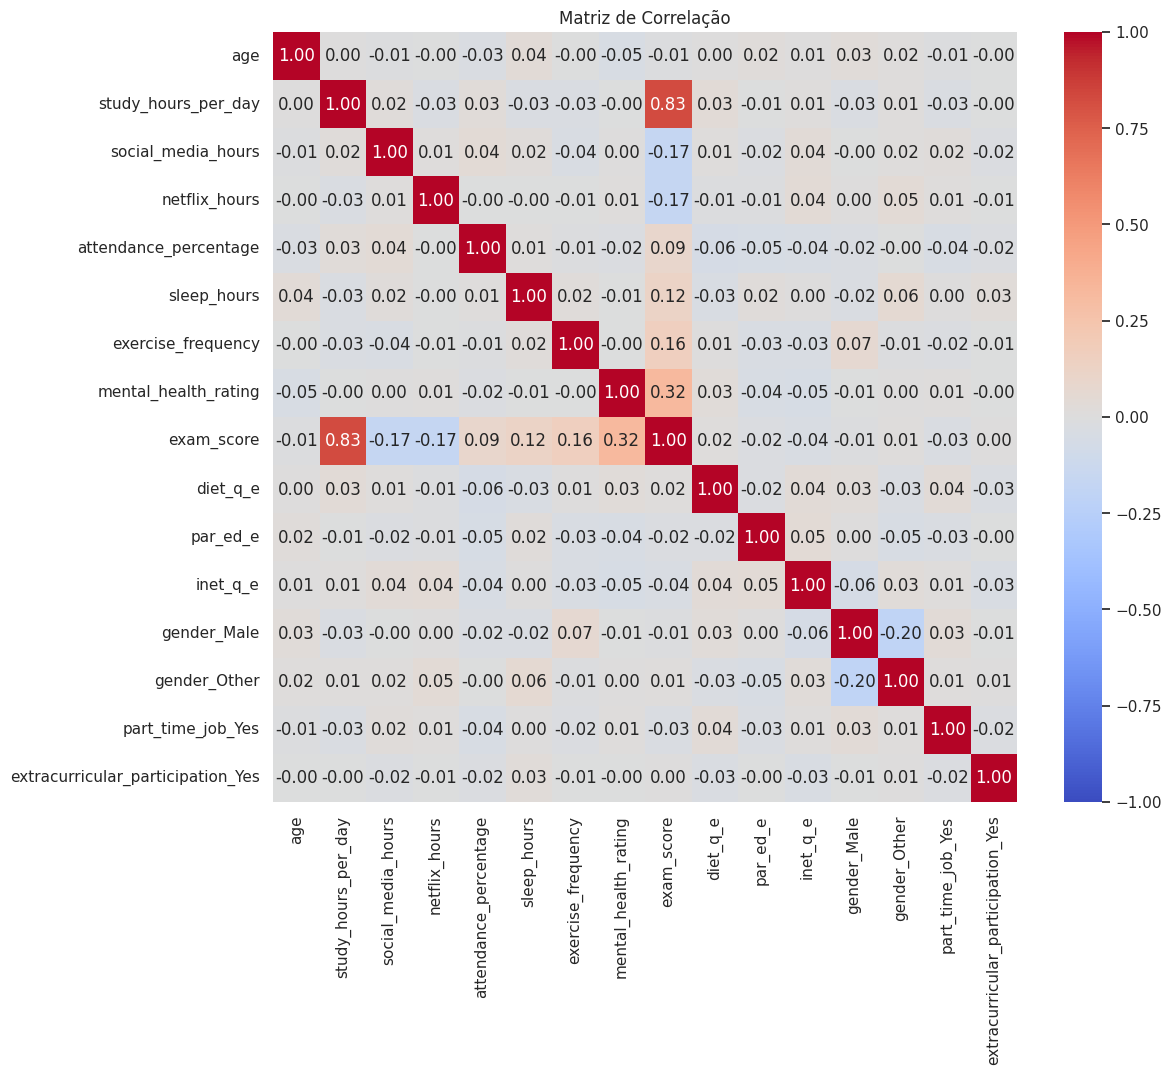

In [29]:
corr = df3.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()


Aqui temos resultados bem coerentes. O ***exam_score*** (notas das provas) tem uma forte correlação positiva com ***study_hour_per_day*** (horas de estudo) (0.83). As duas variáveis são diretamente proporcionais. A segunda maior correlação positiva está relacionada obviamente com a saúde mental (0.32).
Outras correlação positiva é a frequência de exercícios (***exercise_frequency***) (0.16), horas de sono (0.12) e a frequência nas aulas (0.09), tem uma pequena influência positiva. Observa-se também que social_media_hours e netflix_hours tem correlação negativa confrontado com ***exam_score*** (notas das provas), são inversamente proporcionais.

# Split dos Dados

Na prática vou dividir meu dataframe em três categorias: colunas ordinais, colunas nominais e colunas numéricas.<br>Vou escolher uma coluna que é o target, neste caso a coluna ***exam_score***

In [30]:
# Atributos categóricos
ordinal_cols = ['diet_quality', 'parental_education_level', 'internet_quality']
nominal_cols = ['gender', 'part_time_job', 'extracurricular_participation']

# Atributos numéricos (sem o target)
numeric_cols = [
    'age', 'study_hours_per_day', 'social_media_hours',
    'netflix_hours', 'attendance_percentage', 'sleep_hours',
    'exercise_frequency', 'mental_health_rating'
]

# Target: aqui o nosso target é o atributo com o qual queremos confrontar
target_col = 'exam_score'

Aqui vou aplicar às colunas nominais o OHE, às colunas ordinais o OrdinalEncoder, mantendo sempre uma ordem crescente de importância das colunas, da esquerda para a direita (tipo Poor, Fair, Good). Para as colunas numéricas aplico StandardScaler.

In [31]:
# Codificador ordinal com ordem explícita
ord_encoder = OrdinalEncoder(
    categories=[
        ['Poor', 'Fair', 'Good'],               # diet_quality
        ['High School', 'Bachelor', 'Master'],  # parental_education_level
        ['Poor', 'Average', 'Good']             # internet_quality
    ]
)

# Pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('ord', ord_encoder, ordinal_cols),
        ('nom', OneHotEncoder(handle_unknown='ignore'), nominal_cols)
    ]
)

Agora abaixo vou dividir entre treino e teste (split).

In [32]:
# Dataset
X = df.drop(columns=target_col)
y = df[target_col]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('modelo', LinearRegression())
])

# Treinar
pipeline.fit(X_train, y_train)

# Avaliar
score = pipeline.score(X_test, y_test)
print(f"R² no teste: {score:.3f}")

R² no teste: 0.899


Inclui aqui no final do código o treino e a avaliação e parece que deu um resultado bom para o processo.

#Conclusão

Perfeito! Como vimos no mapa de correlação, temos praticamente as respostas para as nossas dúvidas iniciais. Vemos que as horas de estudo tem uma forte correlação positiva com as notas das provas. Por esta correlação ser bem alta em comparação com as outras,
significa que para obter um bom rendimento escolar o principal acima de tudo é estudar. Quanto mais estudar melhores serão as notas.<br><br>
Abaixo disto outro fator importante para ter boas notas é ter uma boa saúde mental, obviamente isto inclui por exemplo não ter problemas familiares, problemas de relacionamento ou vícios.<br><br>
Em seguida, outra correlação positiva comparada com boas notas são as horas de sono e a frequência de exercícios, isto nos diz que não é bom ficar trancado a semana inteira no quarto estudando sem ter um momento para se exercitar e se desestressar ou descansar.<br><br>
Olhando agora para as correlações negativas comparadas com as notas, vemos que realmente perder tempo nas mídias sociais e passar muito tempo assistindo à Netflix não contribui a um bom desempenho escolar e tirar boas notas.

